# <center>Optimization Assignment</center>

---
# **Table of Contents**
---

**1.** [**Problem Statement**](#Section1)<br>
**2.** [**Objective**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)
  - **3.2** [**Upgrading Libraries**](#Section32)
  - **3.3** [**Importing Libraries**](#Section33)

**4.** [**Data Acquisition & Description**](#Section4)<br>
  - **4.1** [**Data Description**](#Section41)<br>

**5.** [**Data Pre-processing**](#Section5)<br>
  - **5.1** [**Pre-Profiling Report**](#Section51)<br>

**6.** [**Exploratory Data Analysis**](#Section6)<br>
**7.** [**Post Data Processing & Feature Selection**](#Section7)<br>
**8.** [**Model Development & Evaluation**](#Section8)<br>
**9.** [**Conclusion**](#Section9)<br>

---
<a name = Section1></a>
# **1. Problem Statement**
---

- **WeatherTech** a start-up working on environmental awareness.

- They have partnered with the **Bureau of Meteorology Australia** to collect data about rainfall throughout the different state of Australia.

- They are trying to build a software that can **predict** if it will rain the next day or not.

- They have hired a team of data scientists to work on this project. Consider you are one of them...





---
<a name = Section2></a>
# **2. Objective**
---

-  The objective of this assignment is to **predict** if it will rain the next day or not.

---
<a name = Section3></a>
# **3. Installing & Importing Libraries**
---

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q ydata-profiling                                     # Library to generate basic statistics about data

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 357.6/357.6 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 381.9/381.9 kB 20.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 20.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.4 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
lida 0.0.10 requires fastapi, which is not installed.
lida 0.0.10 requires kaleido, which is not installed.
lida 0.0.10 requires pyth

<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell above (3.1) and below (3.2) again after restarting the runtime.

In [2]:
!pip install -q --upgrade ydata-profiling

<a name = Section33></a>
### **3.3 Importing Libraries**

In [3]:
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd                                                 # Importing for panel data analysis
from ydata_profiling import ProfileReport                           # Import Ydata Profiling (To generate Univariate Analysis)
pd.set_option('display.max_columns', None)                          # Unfolding hidden features if the cardinality is high
pd.set_option('display.max_colwidth', None)                         # Unfolding the max feature width for better clearity
pd.set_option('display.max_rows', None)                             # Unfolding hidden data points if the cardinality is high
pd.set_option('mode.chained_assignment', None)                      # Removing restriction over chained assignments operations
pd.set_option('display.float_format', lambda x: '%.5f' % x)         # To suppress scientific notation over exponential values
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np                                                  # Importing package numpys (For Numerical Python)
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt                                     # Importing pyplot interface using matplotlib
import seaborn as sns                                               # Importin seaborm library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing standard scaler to perform standardization
from sklearn.base import BaseEstimator                              # To create custom transformers
from sklearn.base import TransformerMixin                           # To create custom transformers
from sklearn.model_selection import KFold                           # To perform K-fold executions
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import classification_report                   # To generate complete report of evaluation metrics
from sklearn.metrics import precision_recall_curve                  # To plot precision recall curve
from sklearn.metrics import ConfusionMatrixDisplay                  # To plot confusion matrix
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.model_selection import train_test_split                # To split the data in training and testing part
from sklearn.linear_model import SGDClassifier                      # To create a SGD-based model
from sklearn.linear_model import LogisticRegression                 # To create a logistic model
from sklearn.preprocessing import LabelBinarizer, LabelEncoder      # Loading encoder library
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from scipy.stats import randint
#-------------------------------------------------------------------------------------------------------------------------------
import warnings                                                     # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")                                   # Warnings will appear only once

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---

- The dataset has been provided by Bureau of Meteorology Australia and it can be retrieved from the attached <a href = "https://raw.githubusercontent.com/insaid2018/Term-4/master/Data/Assignment/weatherAUS.csv">**link**</a>.
<br>

| Records | Features | Dataset Size |
| :-- | :-- | :-- |
| 145460 | 23 | 	25.5 MiB |
<br>

|Id|Feature|Description|
|:--|:--|:--|
|01|**Date**|Date of the reading.|
|02|**Location**|Location of the reading.|
|03|**MinTemp**|Minimum temperature in the 24 hours to 9am (degrees Celsius).|
|04|**MaxTemp**|Maximum temperature in the 24 hours from 9am (degrees Celsius).|
|05|**Rainfall**|Precipitation (rainfall) in the 24 hours to 9am (millimetres).|
|06|**Evaporation**|Evaporation in the 24 hours to 9am (millimetres).|
|07|**Sunshine**|Bright sunshine in the 24 hours to midnigh (	hours).|
|08|**WindGustDir**|Direction of strongest gust in the 24 hours to midnight (compass points).|
|09|**WindGustSpeed**|Speed of strongest wind gust in the 24 hours to midnight (kilometres per hour).|
|10|**WindDir9am**|Wind direction averaged over 10 minutes prior to 9 am (compass points).|
|11|**WindDir3pm**|Wind direction averaged over 10 minutes prior to 3 pm (compass points).|
|12|**WindSpeed9am**|Wind speed averaged over 10 minutes prior to 9 am (kilometres per hour).|
|13|**WindSpeed3pm**|Wind speed averaged over 10 minutes prior to 3 pm (kilometres per hour).|
|14|**Humidity9am**|Relative humidity at 9 am (percent).|
|15|**Humidity3pm**|Relative humidity at 3 pm (	percent).|
|16|**Pressure9am**|Atmospheric pressure reduced to mean sea level at 9 am (hectopascals).|
|17|**Pressure3pm**|Atmospheric pressure reduced to mean sea level at 3 pm (hectopascals).|
|18|**Cloud9am**|	Fraction of sky obscured by cloud at 9 am (eighths).|
|19|**Cloud3pm**|M	Fraction of sky obscured by cloud at 3 pm (eighths).|
|20|**Temp9am**|Temperature at 9 am (degrees Celsius).|
|21|**Temp3pm**|Temperature at 3 pm (degrees Celsius).|
|22|**RainToday**|Tells us that about rainfall today.|
|23|**RainTomorrow**|Tells us that about rainfall tomarrow.|



In [5]:
data = pd.read_csv(filepath_or_buffer='weatherAUS.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (145460, 23)


,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.40000,22.90000,0.60000,NaN,NaN,W,44.00000,W,WNW,20.00000,24.00000,71.00000,22.00000,1007.70000,1007.10000,8.00000,NaN,16.90000,21.80000,No,No
1,2008-12-02,Albury,7.40000,25.10000,0.00000,NaN,NaN,WNW,44.00000,NNW,WSW,4.00000,22.00000,44.00000,25.00000,1010.60000,1007.80000,NaN,NaN,17.20000,24.30000,No,No
2,2008-12-03,Albury,12.90000,25.70000,0.00000,NaN,NaN,WSW,46.00000,W,WSW,19.00000,26.00000,38.00000,30.00000,1007.60000,1008.70000,NaN,2.00000,21.00000,23.20000,No,No
3,2008-12-04,Albury,9.20000,28.00000,0.00000,NaN,NaN,NE,24.00000,SE,E,11.00000,9.00000,45.00000,16.00000,1017.60000,1012.80000,NaN,NaN,18.10000,26.50000,No,No
4,2008-12-05,Albury,17.50000,32.30000,1.00000,NaN,NaN,W,41.00000,ENE,NW,7.00000,20.00000,82.00000,33.00000,1010.80000,1006.00000,7.00000,8.00000,17.80000,29.70000,No,No


<a name = Section41></a>
### **4.1 Data Description**

- In this section we will get **description** and **statistics** about the data.

In [6]:
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.00000,144199.00000,142199.00000,82670.00000,75625.00000,135197.00000,143693.00000,142398.00000,142806.00000,140953.00000,130395.00000,130432.00000,89572.00000,86102.00000,143693.00000,141851.00000
mean,12.19403,23.22135,2.36092,5.46823,7.61118,40.03523,14.04343,18.66266,68.88083,51.53912,1017.64994,1015.25589,4.44746,4.50993,16.99063,21.68339
std,6.39849,7.11905,8.47806,4.19370,3.78548,13.60706,8.91538,8.80980,19.02916,20.79590,7.10653,7.03741,2.88716,2.72036,6.48875,6.93665
min,-8.50000,-4.80000,0.00000,0.00000,0.00000,6.00000,0.00000,0.00000,0.00000,0.00000,980.50000,977.10000,0.00000,0.00000,-7.20000,-5.40000
25%,7.60000,17.90000,0.00000,2.60000,4.80000,31.00000,7.00000,13.00000,57.00000,37.00000,1012.90000,1010.40000,1.00000,2.00000,12.30000,16.60000
50%,12.00000,22.60000,0.00000,4.80000,8.40000,39.00000,13.00000,19.00000,70.00000,52.00000,1017.60000,1015.20000,5.00000,5.00000,16.70000,21.10000
75%,16.90000,28.20000,0.80000,7.40000,10.60000,48.00000,19.00000,24.00000,83.00000,66.00000,1022.40000,1020.00000,7.00000,7.00000,21.60000,26.40000
max,33.90000,48.10000,371.00000,145.00000,14.50000,135.00000,130.00000,87.00000,100.00000,100.00000,1041.00000,1039.60000,9.00000,9.00000,40.20000,46.70000


**Observation**
- **25%**  of the cities have **`MinTemp`** less than equal to **7.6** degrees Celsius.

- **50%**  of the cities have **`MinTemp`** less than equal to **12** degrees Celsius.

- **75%**  of the cities have **`MinTemp`** less than equal to **16** degrees Celsius.

- **25%**  of the cities have **`MaxTemp`** less than equal to **17** degrees Celsius.

- **50%**  of the cities have **`MaxTemp`** less than equal to **22** degrees Celsius.

- **75%**  of the cities have **`MaxTemp`** less than equal to **28** degrees
degrees Celsius.

- Similarly we can understand  the statistical inference for other features.

<a name = Section42></a>
### **4.2 Data Information**

 - In this section, we will get **information about the data** and see some observations.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

**Observation**
- We can see that there are **7 features** with **object** datatype and **16 features** as **float** datatype.

- We can observe that there **exist null data** and we will explore it in-depth in the upcoming session.

<a name = Section5></a>

---
# **5. Data Pre-Processing**
---

<a name = Section51></a>
### **5.1 Pre Profiling Report**

In [9]:
profile = ProfileReport(df=data)
profile.to_file(output_file='Pre_Profiling_Report.html')
print('Accomplished!')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Accomplished!


In [10]:
# from google.colab import files                   # Use only if you are using Google Colab, otherwise remove it
# files.download('Pre_Profiling_Report.html')      # Use only if you are using Google Colab, otherwise remove it

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Observation:**

-  The report shows that there are **23 features** out of which **5 are categorical, 16 are numerical** and **2 are boolean**.

- There exist a total of **343248 missing cells** and **no redundant data** present in the dataset.

- Columns with missing values:

|MinTemp (1.0%)|MaxTemp (0.9%)|Rainfall (2.2%)|Evaporation (43.2%)|Sunshine (48.0%)|WindGustDir (7.1%%)|WindGustSpeed (7.1%)|
|:--|:--|:--|:--|:--|:--|:--|

| WindDir9am (7.3%)|WindDir3pm(2.9%) | WindSpeed9am(1.2%)|WindSpeed3pm (2.1%)|Humidity9am(51.7%)|Humidity3pm (3.1%)|Pressure9am (10.4%)|
|:--|:--|:--|:--|:--|:--|:--|

|Pressure3pm (10.3%)|Cloud9am (38.4%)|Cloud3pm(	40.8%)|Temp9am(1.2%)|Temp3pm(2.5%)|RainToday(2.2%)|RainTomorrow(2.2%)
|:--|:--|:--|:--|:--|:--|:--|

<br>

- Pressure3pm is **highly correlated** with Pressure9am.

- Temp9am is **highly correlated** with MinTemp.

- Temp3pm is **highly correlated** with MaxTemp.

- For further details you can refer to the report.


---
**<h4>Question 1:** Create a function to drop feature containing missing data more than 30%.</h4>

---

<details>

**<summary>Hint:</summary>**

- Use the columns which have more than **30%** of missing values from the above report.

In [11]:
def dropCols():

    # List of columns with more than 30% of missing values.
    dropList = ['Sunshine', 'Cloud9am', 'Cloud3pm', 'Evaporation']

    # Dropping the above list of columns
    data.drop(dropList, axis=1, inplace=True)

    print('Feature Drop Success!')

    print('Final Data Shape:', data.shape)

In [12]:
dropCols()

Feature Drop Success!
Final Data Shape: (145460, 19)


**Observation**

-  We can see that features higher than **30%** of **missing values** have been **dropped successfully**.

---
**<h4>Question 2:** Create a function to change the datatype of the Date feature.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use pandas to_datetime function to convert the Date column into datetime datatype.

In [13]:
def changeDatatype():

    data['Date'] = pd.to_datetime(data['Date'], errors='coerce')

    print('Date data type:', data['Date'].dtype)

In [14]:
changeDatatype()

Date data type: datetime64[ns]


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        143975 non-null  float64       
 3   MaxTemp        144199 non-null  float64       
 4   Rainfall       142199 non-null  float64       
 5   WindGustDir    135134 non-null  object        
 6   WindGustSpeed  135197 non-null  float64       
 7   WindDir9am     134894 non-null  object        
 8   WindDir3pm     141232 non-null  object        
 9   WindSpeed9am   143693 non-null  float64       
 10  WindSpeed3pm   142398 non-null  float64       
 11  Humidity9am    142806 non-null  float64       
 12  Humidity3pm    140953 non-null  float64       
 13  Pressure9am    130395 non-null  float64       
 14  Pressure3pm    130432 non-null  float64       
 15  

**Observation:**

- We can observe that the data type of the Date column has been changed from object to DateTime.

---
**<h4>Question 3:** Create a function to impute null values in numerical and categorical features.</h4>

---
<details>

**<summary>Hint:</summary>**

- Replace all the **null values** in **categorical** features with **mode**.

- Replace all the **null values** in **numerical** features with a **median**.

- Also, check null values after the operation.

In [16]:
def imputeNull():

    for i in data.columns:
        # Finding columns with object datatype.
        if data[i].dtype == 'object':
            # Imputing null values with mode for categorical datatype.
            data[i].fillna(value=data[i].mode()[0], inplace=True)

        # Finding columns with numerical datatype.
        elif data[i].dtype == 'float64':
            # Imputing null values with median for numerical datatype.
            data[i].fillna(value=data[i].median(), inplace=True)

    print('Contains missing data?:', data.isnull().sum().any())

In [17]:
%%time

imputeNull()

Contains missing data?: False
CPU times: user 290 ms, sys: 3.07 ms, total: 293 ms
Wall time: 293 ms


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   Date           145460 non-null  datetime64[ns]
 1   Location       145460 non-null  object        
 2   MinTemp        145460 non-null  float64       
 3   MaxTemp        145460 non-null  float64       
 4   Rainfall       145460 non-null  float64       
 5   WindGustDir    145460 non-null  object        
 6   WindGustSpeed  145460 non-null  float64       
 7   WindDir9am     145460 non-null  object        
 8   WindDir3pm     145460 non-null  object        
 9   WindSpeed9am   145460 non-null  float64       
 10  WindSpeed3pm   145460 non-null  float64       
 11  Humidity9am    145460 non-null  float64       
 12  Humidity3pm    145460 non-null  float64       
 13  Pressure9am    145460 non-null  float64       
 14  Pressure3pm    145460 non-null  float64       
 15  

**Observation**
- We can see that we have successfully imputed the null values in our dataset.

<a name = Section6></a>

---
# **6. Exploratory Data Analysis**
---

---
**<h4>Question 4:** Create a function that displays the distribution of the column Temp3pm with respect to target variable?</h4>

---
<details>

**<summary>Hint:</summary>**

- You can use seaborn kdeplot function to display temp3pm column wrt to RainTommorrow.

- Additionally, you have to show the proportion of class variation.

- You can use the following settings to make your visualization attractive:

    - `figsize` : (20, 10),

    - `fontsize`: 14 (for xlabel, ylabel),

    - `fontsize`: 16 (for title)


In [19]:
def displayProp():

    # Setting figure size to (20, 10)
    plt.figure(figsize=(20, 10))

    plt.subplot(2, 2, 4)
    sns.kdeplot(x='Temp3pm', hue='RainTomorrow', data=data, color='lightgreen')
    plt.xlabel('temp', size = 14)
    plt.ylabel('density', size = 14)
    plt.title('Distribution of Temp3pm', size = 16)
    plt.tight_layout()
    plt.show()

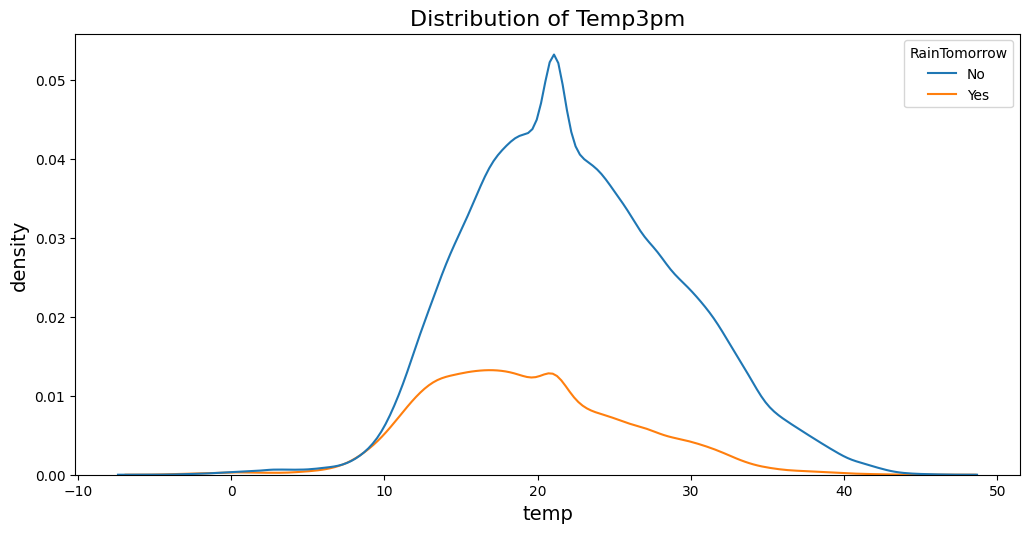

In [20]:
displayProp()

**Observation**:


---
**<h4>Question 5:** Create a function that displays temperature at 9 AM across different locations and their means.
</h4>

---
<details>

**<summary>Hint:</summary>**

- You can use seaborn boxplot function to display the frequency of the location wrt to Temp9am.

- You can use the following settings to make your visualization attractive:

    - `figsize` : (20, 7),

    - `fontsize`: 14 (for xlabel, ylabel),

    - `fontsize`: 16 (for title)


In [21]:
def TempLoc():

    # Plot box plot of temperature across different locations
    plt.figure(figsize=(20, 7))

    # Using seaborn countplot to plot the graph
    sns.boxplot(x='Location', y='Temp9am', data=data)

    #Rotating the X label for better readability.
    plt.xticks(rotation=90)

    # Adding label and title in the plot
    plt.title("Temperature according to Location", fontsize=16)
    plt.xlabel("Location", fontsize=14)
    plt.ylabel("Temp", fontsize=14)
    plt.show()

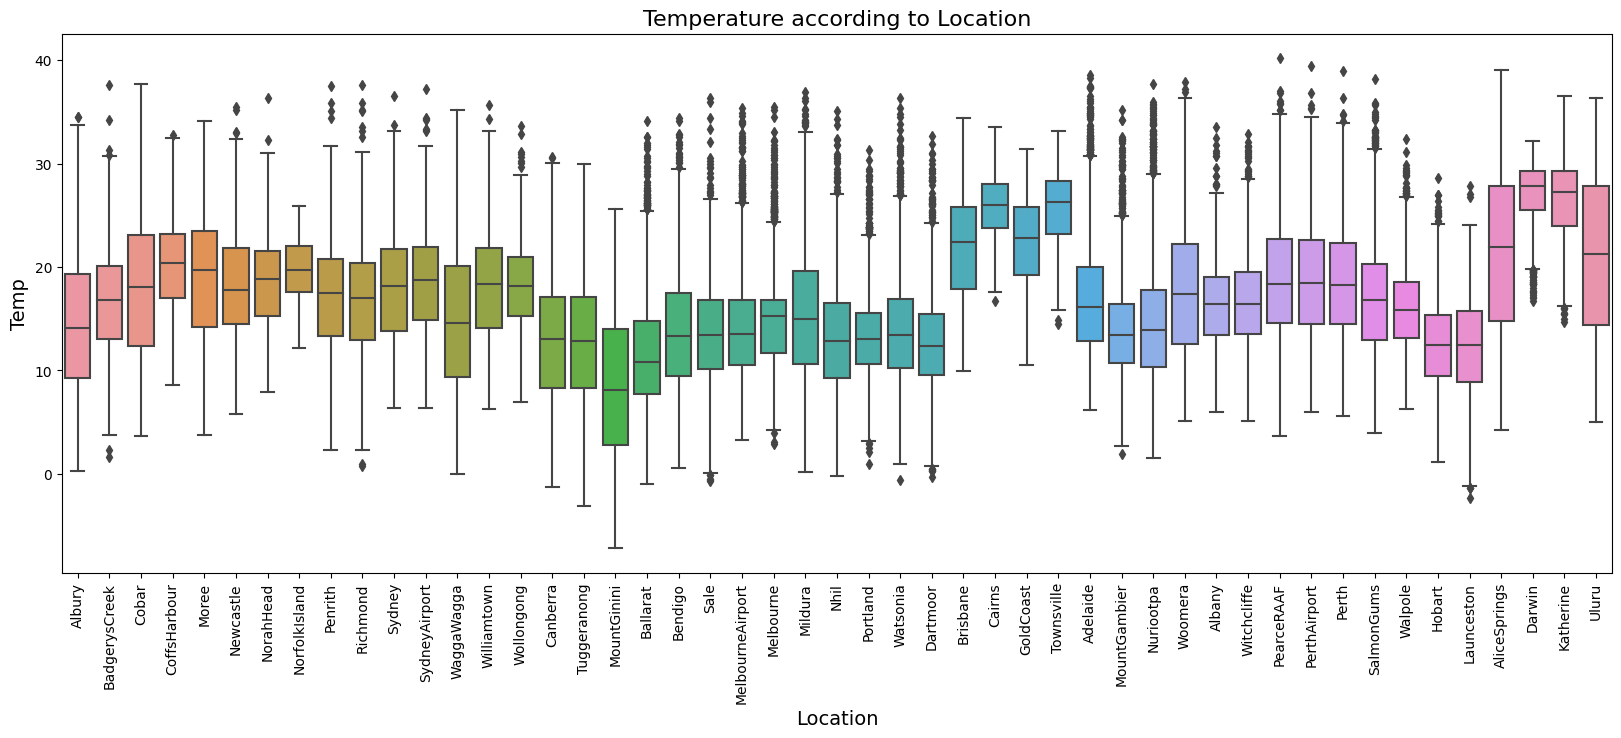

In [22]:
TempLoc()

**Observation**

---
**<h4>Question 6:** Create a function that displays the Plot of time series of temperature and rainfall over years?</h4>

---
<details>

**<summary>Hint:</summary>**

- You can use seaborn function to display the timeseries between temperature and rainfall.
- `plt.plot(data.groupby(data[''].dt.year)[''].mean(), label='') , use this code and fill the blanks with answers`

- You can use the following settings to make your visualization attractive:

    - `figsize` : (15, 8),

    - `fontsize`: 14 (for xlabel, ylabel),

    - `fontsize`: 16 (for title)

In [23]:
def rainGust():

    plt.figure(figsize=(15, 8))
    # Plot time series of temperature and rainfall over years
    plt.plot(data.groupby(data['Date'].dt.year)['Temp9am'].mean(), label='Temperature')
    plt.plot(data.groupby(data['Date'].dt.year)['Rainfall'].mean(), label='Rainfall')
    plt.legend()
    plt.xlabel('Year')
    plt.ylabel('Value')
    plt.show()

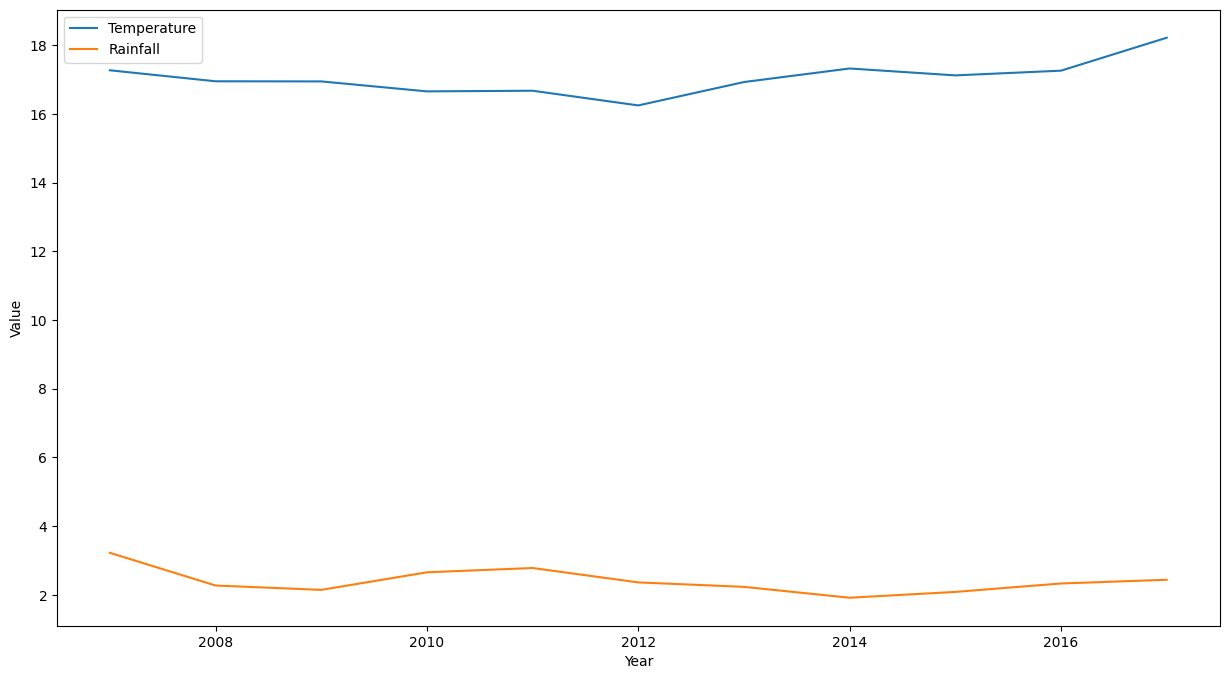

In [24]:
rainGust()

**Observation**:

<a name = Section7></a>

---
# **7. Post Data Processing & Feature Selection**
---

---
**<h4>Question 7:** Create a function to check the cardinality of different categorical values in the dataset?</h4>

---
<details>

**<summary>Hint:</summary>**

- Print the cardinality of different  columns in a dataframe.

In [25]:
def checkCardinality():
    # Intialize empty list for categorical features and their length
    cat_features = []
    label_len = []

    # Identify categorical features
    for i in data.columns:
        if (data[i].dtype == object):
            cat_features.append(i)

    # Identify labels length per feature
    for i in cat_features:
        label_len.append(len(data[i].unique()))

    # Display total categorical features
    print('Total Categorical Features:', len(cat_features))

    # Create and show categorical feature frame
    cat_frame = pd.DataFrame(data = {'Length': label_len}, index=cat_features)
    return cat_frame.transpose()

In [26]:
cat_frame = checkCardinality()
cat_frame

Total Categorical Features: 6


,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
Length,49,16,16,16,2,2


**Observation**
- We can see that there are a total of **6 categorical features** in the dataset.

---
**<h4>Question 8:** Create a function that performs encoding over categorical features</h4>

---
<details>

**<summary>Hint:</summary>**

- You have to perform label encoding for the features having low cardinality.


In [27]:
from sklearn.preprocessing import LabelEncoder

def encodeCat(data):

    # Performing label encoding on features having low cardinality
    data['RainToday'] = data['RainToday'].apply(lambda x: 1 if x=='Yes' else 0)
    data['RainTomorrow'] = data['RainTomorrow'].apply(lambda x: 1 if x=='Yes' else 0)

    # Performing label encoding on features having high cardinality
    le = LabelEncoder()
    for col in ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']:
        data[col] = le.fit_transform(data[col].astype(str))

    return data

In [28]:
data = encodeCat(data)
data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,2,13.40000,22.90000,0.60000,13,44.00000,13,14,20.00000,24.00000,71.00000,22.00000,1007.70000,1007.10000,16.90000,21.80000,0,0
1,2008-12-02,2,7.40000,25.10000,0.00000,14,44.00000,6,15,4.00000,22.00000,44.00000,25.00000,1010.60000,1007.80000,17.20000,24.30000,0,0
2,2008-12-03,2,12.90000,25.70000,0.00000,15,46.00000,13,15,19.00000,26.00000,38.00000,30.00000,1007.60000,1008.70000,21.00000,23.20000,0,0
3,2008-12-04,2,9.20000,28.00000,0.00000,4,24.00000,9,0,11.00000,9.00000,45.00000,16.00000,1017.60000,1012.80000,18.10000,26.50000,0,0
4,2008-12-05,2,17.50000,32.30000,1.00000,13,41.00000,1,7,7.00000,20.00000,82.00000,33.00000,1010.80000,1006.00000,17.80000,29.70000,0,0


**Observation**

- We can observe that we have successfully encoded our categorical features.

---
**<h4>Question 9:** Create a function that generates new features from the Date feature?</h4>

---

<details>

**<summary>Hint:</summary>**

- Extract year, month and day from the **Date** feature.

In [29]:
def dateFeature():

    # Extracting year, month and day from the Date feature
    data['Year'] = data['Date'].dt.year
    data['Month'] = data['Date'].dt.month
    data['Day'] = data['Date'].dt.day

    # Dropping the Date feature
    data.drop(['Date'], axis=1, inplace=True)

In [30]:
dateFeature()
data.head()

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.40000,22.90000,0.60000,13,44.00000,13,14,20.00000,24.00000,71.00000,22.00000,1007.70000,1007.10000,16.90000,21.80000,0,0,2008,12,1
1,2,7.40000,25.10000,0.00000,14,44.00000,6,15,4.00000,22.00000,44.00000,25.00000,1010.60000,1007.80000,17.20000,24.30000,0,0,2008,12,2
2,2,12.90000,25.70000,0.00000,15,46.00000,13,15,19.00000,26.00000,38.00000,30.00000,1007.60000,1008.70000,21.00000,23.20000,0,0,2008,12,3
3,2,9.20000,28.00000,0.00000,4,24.00000,9,0,11.00000,9.00000,45.00000,16.00000,1017.60000,1012.80000,18.10000,26.50000,0,0,2008,12,4
4,2,17.50000,32.30000,1.00000,13,41.00000,1,7,7.00000,20.00000,82.00000,33.00000,1010.80000,1006.00000,17.80000,29.70000,0,0,2008,12,5


**Observation**

- We can observe that we have **successfully extracted** year, month, and day from the **Date** feature.

---
**<h4>Question 10:** Create a function that splits and normalize the data as input and output.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use StandardScaler() function to scale the data defined in the preprocessing library.

In [31]:
def data_prep(data):

    # Seperating independent and dependent features.
    X=data.drop(columns=['RainTomorrow'])
    y=data['RainTomorrow']

    # Scaling the data
    sc = StandardScaler()
    X = sc.fit_transform(X)

    return X, y

In [32]:
X, y = data_prep(data)

---
**<h4>Question 11:** Create a function that splits the data into train and test set.</h4>

---

<details>

**<summary>Hint:</summary>**

- You can use the following settings to split the data:

  - `test_size`: 0.2,

  - `random_state `: 42,

  - `stratify`: y


In [33]:
def data_prep(X, y):

    # Splitting the data into train and test set.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

    return X_train, X_test, y_train, y_test

In [34]:
X_train, X_test, y_train, y_test = data_prep(X, y)

<a name = Section8></a>

---
# **8. Model Development & Evaluation**
---

- In this section, we will **develop an optimizing model** and compare the runtime with other models.

- Then we will **analyze the results** obtained and **make our observation**.

- **Remember** that **we want to generalize results** i.e. same results or error on testing data as that of training data.

---
**<h4>Question 12:** Create a function to instantiate a random forest classifier with the following settings and print the model's accuracy.</h4>

---
<details>

**<summary>Hint:</summary>**

- You have to use the hyperparameters setting of the model as follows:

  - `random_state`: 42

In [35]:
def dtc1():
    dtc = DecisionTreeClassifier(random_state=42)
    dtc.fit(X_train, y_train)
    return dtc

In [36]:
%%time
dtc = dtc1()

CPU times: user 2.11 s, sys: 3.64 ms, total: 2.12 s
Wall time: 2.14 s


---
**<h4>Question 13:** Create a function to print the model's accuracy without hyperparameter tuning.</h4>

---
<details>

**<summary>Hint:</summary>**

- You have to use score method to take get the accuracy of the model

In [37]:
def Acc():
    # Evaluate model performance on testing set
    accuracy = dtc.score(X_test, y_test)
    print(f"Accuracy without hyperparameter tuning: {accuracy:.3f}")

In [38]:
Acc()

Accuracy without hyperparameter tuning: 0.782


---
**<h4>Question 14:** Create a function to define range of different Hyperparameters and perform random search cv .</h4>

---

<details>

**<summary>Hint:</summary>**

- You have to use the hyperparameters of Decision tree and they are as follows:

  - `max_depth`
  - `min_samples_split`
  - `min_samples_leaf`
  - `max_features`
  - `criterion`

In [39]:
# Define hyperparameter range for Random Search CV
param_distributions = {
    'max_depth': randint(low=1, high=10),
    'min_samples_split': randint(low=2, high=10),
    'min_samples_leaf': randint(low=1, high=5),
    'max_features': ['sqrt', 'log2', None],
    'criterion': ['gini', 'entropy']
}
# Perform Random Search CV
random_search = RandomizedSearchCV(dtc, param_distributions=param_distributions, n_iter=100, random_state=42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe93fd469e0>,
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe9442d8340>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7fe93fd46e30>},
                   random_state=42)

---
**<h4>Question 14:** Print the best Hyperparameters which was found with Random search cv .</h4>

---

<details>

**<summary>Hint:</summary>**
- You have to use `best params` method to extract the hyperparameters

In [40]:
def params():
    # Print best hyperparameters
    print("Best hyperparameters from Random Search CV:")
    print(random_search.best_params_)

In [41]:
params()

Best hyperparameters from Random Search CV:
{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 4}


---
**<h4>Question 15:** Fit a decision tree model with the best Hyperparameters which was found with Random search cv and get the accuracy of the model .</h4>

---
<details>

**<summary>Hint:</summary>**

- You have to use `beset params` method to extract the best hyperparameters and fit to dtc

In [42]:
def rdtc():
    # Fit DecisionTreeClassifier model with best hyperparameters from Random Search CV
    dtc_random = DecisionTreeClassifier(
        max_depth=random_search.best_params_['max_depth'],
        min_samples_split=random_search.best_params_['min_samples_split'],
        min_samples_leaf=random_search.best_params_['min_samples_leaf'],
        max_features=random_search.best_params_['max_features'],
        criterion=random_search.best_params_['criterion'],
        random_state=42)
    dtc_random.fit(X_train, y_train)

    # Evaluate model performance on testing set
    accuracy_random = dtc_random.score(X_test, y_test)
    print(f"Accuracy with Random Search CV: {accuracy_random:.3f}")

In [43]:
rdtc()

Accuracy with Random Search CV: 0.842


---
**<h4>Question 16:** Fit a decision tree model with the best Hyperparameters which was found with Grid search cv and get the accuracy of the model .</h4>

---
<details>

**<summary>Hint:</summary>**
- You have to follow the same steps that you did with random search cv with some minute changes.

In [44]:
def gdtc():
# Define hyperparameter grid for Grid Search CV
    param_grid = {
        'max_depth': [2, 4, 6, 8, 10],
        'min_samples_split': [2, 4, 6, 8, 10],
        'min_samples_leaf': [1, 2, 3],
        'max_features': ['sqrt', 'log2', None],
        'criterion': ['gini', 'entropy']
    }

    # Perform Grid Search CV
    grid_search = GridSearchCV(dtc, param_grid=param_grid, cv=5)
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters
    print("Best hyperparameters from Grid Search CV:")
    print(grid_search.best_params_)

    # Fit DecisionTreeClassifier model with best hyperparameters from Grid Search CV
    dtc_grid = DecisionTreeClassifier(
        max_depth=grid_search.best_params_['max_depth'],
        min_samples_split=grid_search.best_params_['min_samples_split'],
        min_samples_leaf=grid_search.best_params_['min_samples_leaf'],
        max_features=grid_search.best_params_['max_features'],
        criterion=grid_search.best_params_['criterion'],
        random_state=42)
    dtc_grid.fit(X_train, y_train)

    # Evaluate model performance on testing set
    accuracy_grid = dtc_grid.score(X_test, y_test)
    print(f"Accuracy with Grid Search CV: {accuracy_grid:.3f}")

In [45]:
gdtc()

Best hyperparameters from Grid Search CV:
{'criterion': 'gini', 'max_depth': 8, 'max_features': None, 'min_samples_leaf': 3, 'min_samples_split': 2}
Accuracy with Grid Search CV: 0.842


<a name = Section9></a>

---
# **9. Conclusion**
---

- By using both RandomizedSearchCV and GridSearchCV getting the same accuracy for DecisionTreeClassifier model
- But RandomizedSearchCV runs much faster than the GridSearchCV
- So for the further it has been noted that, If having higher computation power the will go with the GridSearchCV as it will gives perfect tuned hyperparamers
- also RandomizedSearchCV can be used if having computation power / time limitations and some minor accuracy can be compromized by the client